## Project #3 - Non-linear regression

**Noa Finkenhagen and Andreas Faye Werner**

## Abstract

...

## Introduction

In this project we will look at non-linear regression and make a model that can predict Vp. We will start by plotting our data to find out what function form to use. Then we will find out the attribute that yields the best R2 score, and use this to calculate C0. We will also compare one of our models with the Gardner model and compare these two.

## Tasks

### Non-linear regression

In [52]:
# Import important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# Read data
df = pd.read_excel('LogDataProject_Cleaned_OutliersRemoved.xlsx')

In [53]:
# Define input (x) and target (y)
X1 = df['Vs']
X2 = df['DEN']
X3 = df['NEU']
y = df['Vp']

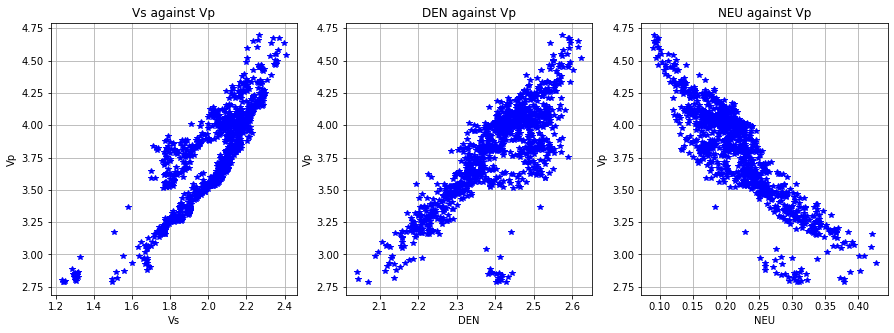

In [54]:
# Create plots for each of the different features
fig, axes = plt.subplots(1, 3, figsize=(15,5)) 
axes[0].plot(X1, y, "b*")
axes[0].set_xlabel("Vs")
axes[0].set_ylabel("Vp")
axes[0].set_title("Vs against Vp")
axes[0].grid()

axes[1].plot(X2, y, "b*")
axes[1].set_xlabel("DEN")
axes[1].set_ylabel("Vp")
axes[1].set_title("DEN against Vp")
axes[1].grid()

axes[2].plot(X3, y, "b*")
axes[2].set_xlabel("NEU")
axes[2].set_ylabel("Vp")
axes[2].set_title("NEU against Vp")
axes[2].grid()

**Comment:** The *Vs* against *Vp* plot, shows that there seems to be a positive correlation between *Vs* and *Vp*. As *Vs* increases, *Vp* will also increase. The same is true for the *DEN* against *Vp* plot. The *NEU* against *Vp* plot, shows that there seems to be a negative correlation between *NEU* and *Vp*. As *NEU* increases, *Vp* tends to decrease. The distribution of data points in all plots, suggests that the relationships are nonlinear. More exact, the shapes hint of an exponential graph. Therefore, we will use the exponential function form in our next task.

In [55]:
# Defining Function Form

# Based on the trend in the plots above, we will use the exponential function form
def func(x, a, b):
    return a**np.exp(-b*x)

#### Modeling and model performance analysis

a: 1.916726999263222, b: -0.35170324842239564
a: 1.4539358907000883, b: -0.5274380282570251
a: 5.345466228705084, b: 1.0667371787926736


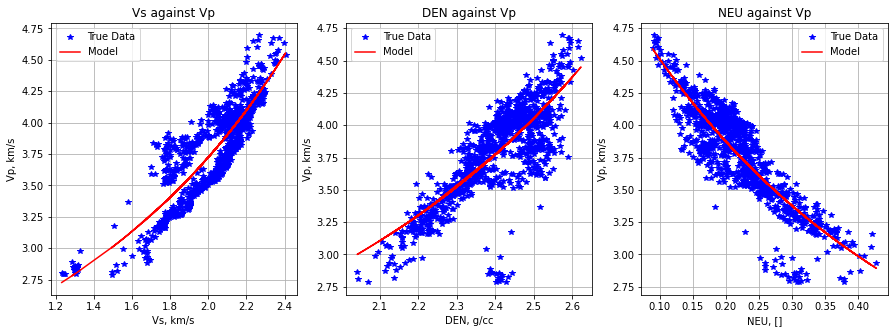

In [56]:
# Optimize the parameters values a and b
popt1, _ = curve_fit(func, X1, y)
popt2, _ = curve_fit(func, X2, y)
popt3, _ = curve_fit(func, X3, y)

# Print the optimized paramaters
a1, b1 = popt1
print(f"a: {a1}, b: {b1}")

a2, b2 = popt2
print(f"a: {a2}, b: {b2}")

a3, b3 = popt3
print(f"a: {a3}, b: {b3}")

# Create plots for each of the different features
fig, axes = plt.subplots(1, 3, figsize=(15,5)) 

# Vs
y1_model_predict = func(X1, a1, b1)
axes[0].plot(X1, y, "b*")
axes[0].plot(X1, y1_model_predict, 'r-')
axes[0].set_xlabel("Vs, km/s")
axes[0].set_ylabel("Vp, km/s")
axes[0].set_title("Vs against Vp")
axes[0].legend(["True Data", "Model"])
axes[0].grid()

# DEN
y2_model_predict = func(X2, a2, b2)
axes[1].plot(X2, y, "b*")
axes[1].plot(X2, y2_model_predict, 'r-')
axes[1].set_xlabel("DEN, g/cc")
axes[1].set_ylabel("Vp, km/s")
axes[1].set_title("DEN against Vp")
axes[1].legend(["True Data", "Model"])
axes[1].grid()

# NEU
y3_model_predict = func(X3, a3, b3)
axes[2].plot(X3, y, "b*")
axes[2].plot(X3, y3_model_predict, 'r-')
axes[2].set_xlabel("NEU, []")
axes[2].set_ylabel("Vp, km/s")
axes[2].set_title("NEU against Vp")
axes[2].legend(["True Data", "Model"])
axes[2].grid()

**Comment:** The model seems to capture the overall trend of the data in all plots. In the *Vs* against *Vp* plot, the model captures the upward trend of *Vp* as *Vs* increases. The same is true for the *DEN* against *Vp* plot. For *NEU* against *Vp*, the model captures the overall downward trend, indicating a negative relationship between *NEU* and *Vp*. 

In [57]:
# Print R2 scores

print(f'R2 score: {r2_score(y, y1_model_predict)}')
print(f'R2 score: {r2_score(y, y2_model_predict)}')
print(f'R2 score: {r2_score(y, y3_model_predict)}')

R2 score: 0.7534362929815764
R2 score: 0.6209256863405168
R2 score: 0.7566606824866008


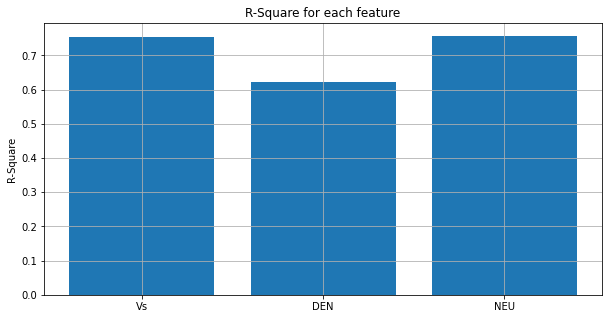

In [58]:
# R2 bar graph

plt.figure(figsize=(10,5))
plt.bar(['Vs','DEN','NEU'], [r2_score(y, y1_model_predict), r2_score(y, y2_model_predict), r2_score(y, y3_model_predict)])
plt.ylabel('R-Square')
plt.title('R-Square for each feature')
plt.grid()
plt.show()

**Comment:** The r-squared value for *Vs*, of 0.7534 suggests that approximately 75.34% of the variance in *Vp* is predictable from *Vs*. The r-squared value for *DEN*, of 0.6209 suggests that approximately 62.09% of the variance in *Vp* is predictable from *DEN*. Lastly, the r-squared value for *NEU*, of 0.7566 suggests that approximately 75.66% of the variance in *Vp* is predictable from *NEU*. This is the highest r-squared value, so this will be used in the model to calculate the uniaxial compressive strength in the next task.

#### Calculating Uniaxial Compressive Strenght With The Best Model

In [59]:
# define the C0 fuction
def C0(Vp):
    return 0.77 * Vp**2.92

In [60]:
C0_true = C0(y)
C0_pred = C0(y3_model_predict)

# Calculate the R2
r2 = r2_score(C0_true, C0_pred)
print('R-Square:', r2)

R-Square: 0.7528998052373731


**Comment:** The r-squared value of 0.7529 suggests that the models predictions, when transformed by the *C0* function, explain approximately 75.29% of the variance in the transformed actual values. This is a relatively high r-squared value and indicates that the model has a good predictive power for the transformed variable. 

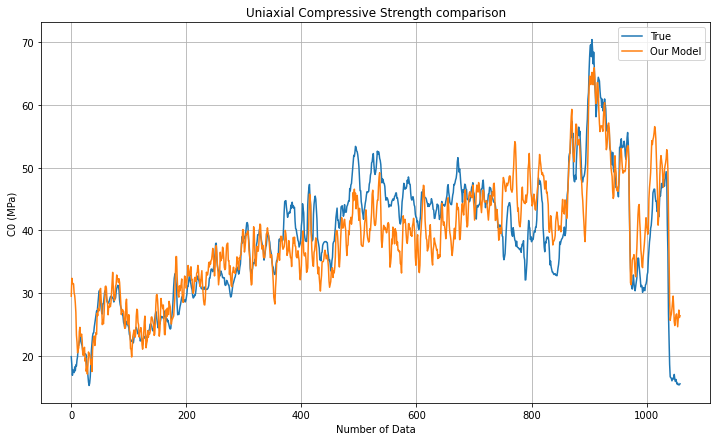

In [61]:
plt.figure(figsize=(12,7))
plt.plot(C0_true)
plt.plot(C0_pred)
plt.xlabel("Number of Data")
plt.ylabel("C0 (MPa)")
plt.title("Uniaxial Compressive Strength comparison")
plt.legend(['True','Our Model'])
plt.grid()
plt.show()

**Comment:** In the plot, we can see that our model follow the trend of the true values. This suggests that the model has captured the general pattern in the data well. Our model seems to capture some of the fluctuations, but there are places where the predicted values diverge from the true values. Overall, our model seems to capture to essence of the true values. 

#### Comparing Our model using DEN against Gardner [1]

In [62]:
# Defining Gardner equation
def Gardner(DEN):
    return 0.0003048* ((DEN/0.23)**4)

In [63]:
DEN = df[['DEN']]
C0_true = C0(y)
C0_pred_gardner = C0(Gardner(np.array(DEN)))
C0_pred_our_model = C0(y3_model_predict)

# Calculate the R2
print('R-Square Gardner and true:', r2_score(C0_pred_gardner, C0_true))
print('R-Square Our model and true:', r2_score(C0_true, C0_pred_our_model))

R-Square Gardner and true: 0.55337303771854
R-Square Our model and true: 0.7528998052373731


**Comment:** The r-squared value for the Gardner model of 0.5534, shows that the Gardner model explains about 55.34% of the variance in the target value. On the other hand, our model with a r-squared value of 0.7529, shows that our model explains 75.29% of the variance in the target value. Here it is clear that our model outperforms the Gardner model, based on the r-squared value.

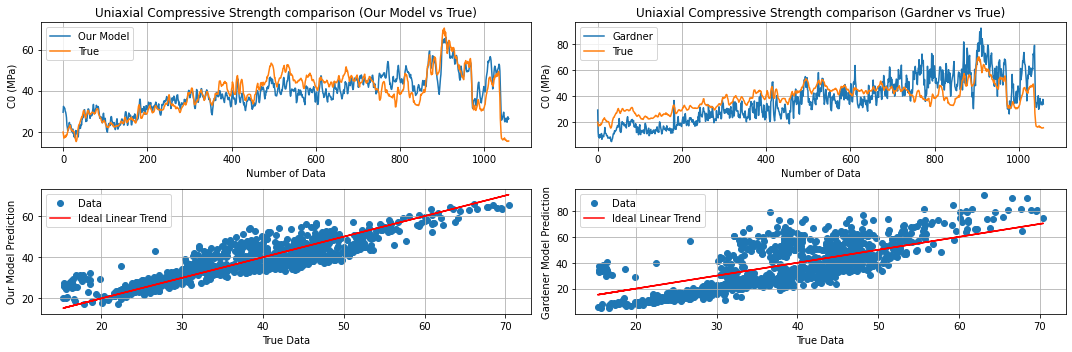

In [74]:
# Plot

# Creating subplots
fig, axes = plt.subplots(2, 2, figsize=(15,5)) 
# Plotting the first set of data (C0_mymodel and C0_true)
axes[0,0].plot(C0_pred_our_model, label='Our Model')
axes[0,0].plot(C0_true, label='True')
axes[0,0].set_xlabel("Number of Data")
axes[0,0].set_ylabel("C0 (MPa)")
axes[0,0].set_title("Plot 1 - Uniaxial Compressive Strength comparison (Our Model vs True)")
axes[0,0].legend()
axes[0,0].grid()

# Plotting the second set of data (C0_castagna and C0_true)
axes[0,1].plot(C0_pred_gardner, label='Gardner')
axes[0,1].plot(C0_true, label='True')
axes[0,1].set_xlabel("Number of Data")
axes[0,1].set_ylabel("C0 (MPa)")
axes[0,1].set_title("Plot 2 - Uniaxial Compressive Strength comparison (Gardner vs True)")
axes[0,1].legend()
axes[0,1].grid()

axes[1,0].scatter(C0_true, C0_pred_our_model)
axes[1,0].plot(C0_true, C0_true, "r")
axes[1,0].set_xlabel("True Data")
axes[1,0].set_ylabel("Our Model Prediction")
plt.title('Plot 3 - Model with linear trend')
axes[1,0].legend(["Data", "Ideal Linear Trend"])
axes[1,0].grid()


axes[1,1].scatter(C0_true, C0_pred_gardner)
axes[1,1].plot(C0_true, C0_true, "r")
axes[1,1].set_xlabel("True Data")
axes[1,1].set_ylabel("Gardener Model Prediction")
plt.title('Plot 4 - Gardner Model with linear trend')
axes[1,1].legend(["Data", "Ideal Linear Trend"])
axes[1,1].grid()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


**Comment:** The first plot shows our model overlapping the true values. The close tracking between the two lines indicates that our model has a good fit to the actual data. The second plot shows the same as the first plot, but now with the Gardner model. We can see that the Gardner model don't follow the true values, as close as our model. The third and fourth plot show scatter plots between true values and model predictions. The closer the points are to the red line (the ideal linear trend), the better the model's prediction. Therefore, since the data points in plot 3 (our model) is closer to the red line, than the Gardner data, we can say that our model performs better than Gardner.

## Discussion and conclusion

...

## Reflections

...

## References

[1] Gardner, G.H.F,; Gardner L.W.; Gregory A.R. (1974). "Formation velocity and density -- the diagnostic basics for stratigic traps" (PDF). Geophysics. 39: 770-780. 1974

...